# Proyek Analisis Data: Bike-Sharing-Dataset
- Nama: Fauzi Ramadhan
- Email: fauzir008@gmail.com
- Id Dicoding: fauzi_ramadhan_ujcf

## Menentukan Pertanyaan Bisnis

*    Bagaimana jumlah pengguna sepeda harian dipengaruhi oleh faktor-faktor seperti cuaca dan hari kerja?
*   Apakah suhu dan kelembaban memiliki pengaruh pada penggunaan sepeda?
*   Apakah terdapat perbedaan dalam penggunaan sepeda antara hari kerja dan hari libur pada jam-jam tertentu?
*   Bagaimana faktor cuaca mempengaruhi penggunaan sepeda pada level jam dalam sehari?


## Menyiapkan semua library yang dibutuhkan


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

## Data Wrangling

### Gathering Data

In [76]:
#Mengimpor Dataset
url = "https://raw.githubusercontent.com/MonkeyDMamat/MonkeyDMamat/master/Submission/Dataset/day.csv"
customer_df = pd.read_csv(url)
customer_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [77]:
#Mengimpor Dataset
url = "https://raw.githubusercontent.com/MonkeyDMamat/MonkeyDMamat/master/Submission/Dataset/hour.csv"
customer_df = pd.read_csv(url)
customer_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [ ]:
# Mengimpor Dataset day.csv
url_day = "https://raw.githubusercontent.com/MonkeyDMamat/MonkeyDMamat/master/Submission/Dataset/day.csv"
day_df = pd.read_csv(url_day)
day_df.head()

# Mengimpor Dataset hour.csv
url_hour = "https://raw.githubusercontent.com/MonkeyDMamat/MonkeyDMamat/master/Submission/Dataset/hour.csv"
hour_df = pd.read_csv(url_hour)
hour_df.head()

# Periksa informasi dataset
day_df.info()
hour_df.info()

# Periksa nilai yang hilang
day_df.isnull().sum()

# Atau, Anda dapat mengecek nilai yang hilang di kedua dataset sekaligus
hour_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Cleaning Data

In [ ]:
day = url_day = "https://raw.githubusercontent.com/MonkeyDMamat/MonkeyDMamat/master/Submission/Dataset/day.csv"


Q1 = day_df['temp'].quantile(0.25)
Q3 = day_df['temp'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = day_df['temp'] < minimum
kondisi_more_than = day_df['temp'] > maximum

day_df.drop(day_df[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df[kondisi_more_than].index, inplace=True)

day_df.drop_duplicates(inplace=True)
hour_df.dropna(axis=0, inplace=True)

hour = url_hour = "https://raw.githubusercontent.com/MonkeyDMamat/MonkeyDMamat/master/Submission/Dataset/hour.csv"

Q1 = hour_df['atemp'].quantile(0.25)
Q3 = hour_df['atemp'].quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

kondisi_lower_than = hour_df['atemp'] < minimum
kondisi_more_than = hour_df['atemp'] > maximum

hour_df.drop(hour_df[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)

hour_df.drop_duplicates(inplace=True)
hour_df.dropna(axis=0, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

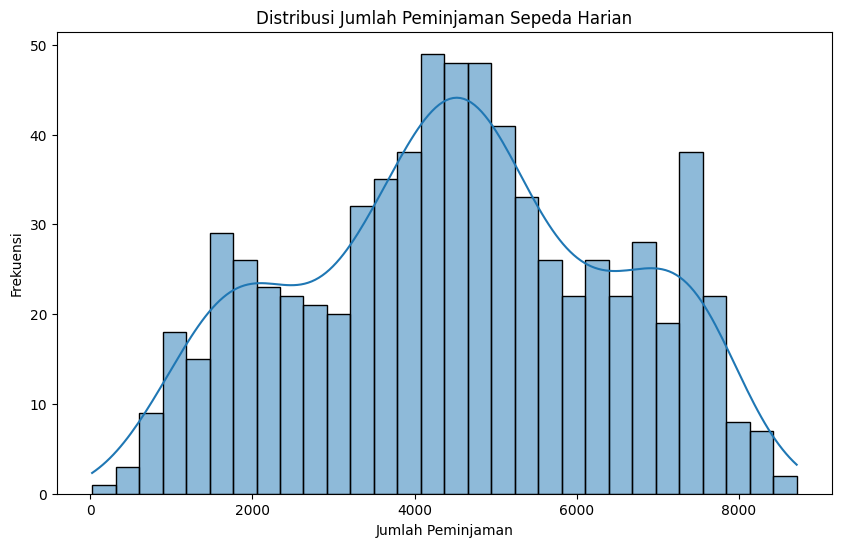

<ipython-input-57-82bd17f1bd61>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_day = day_df.corr()


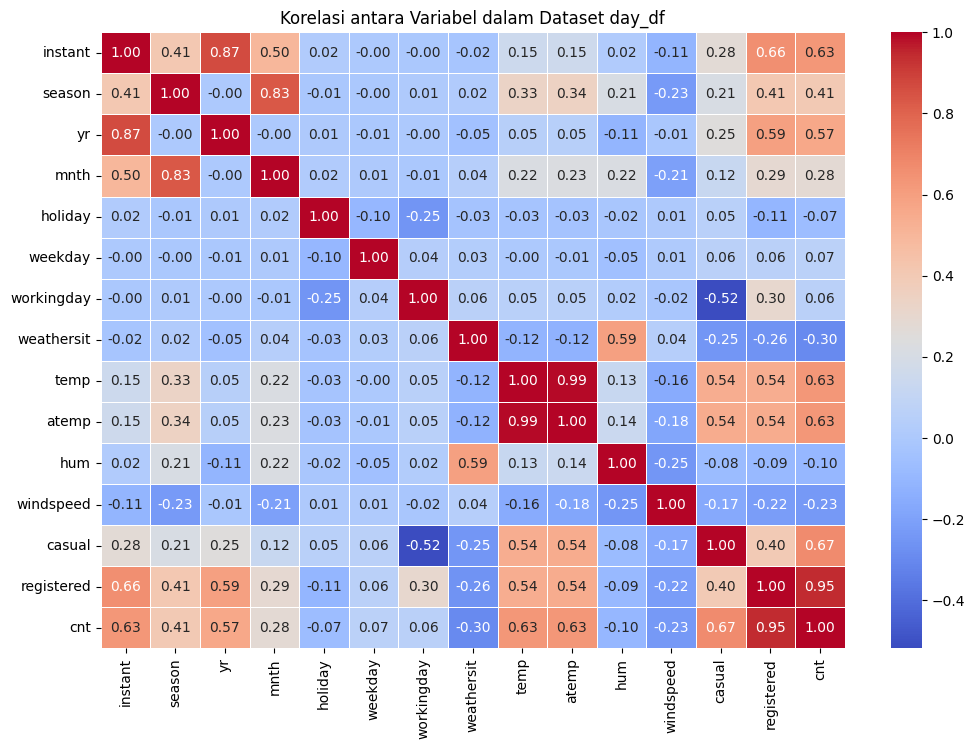

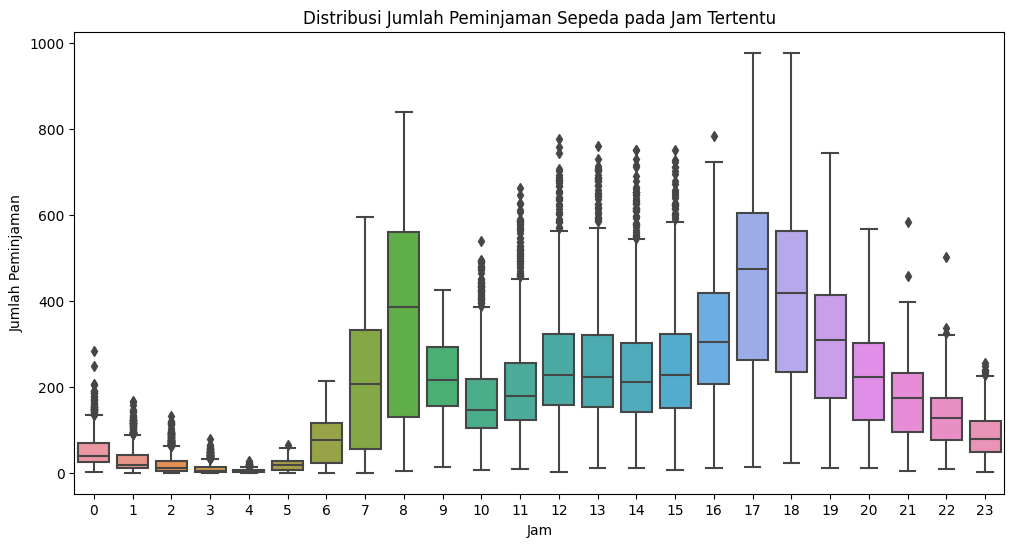

<ipython-input-57-82bd17f1bd61>:27: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_hour = hour_df.corr()


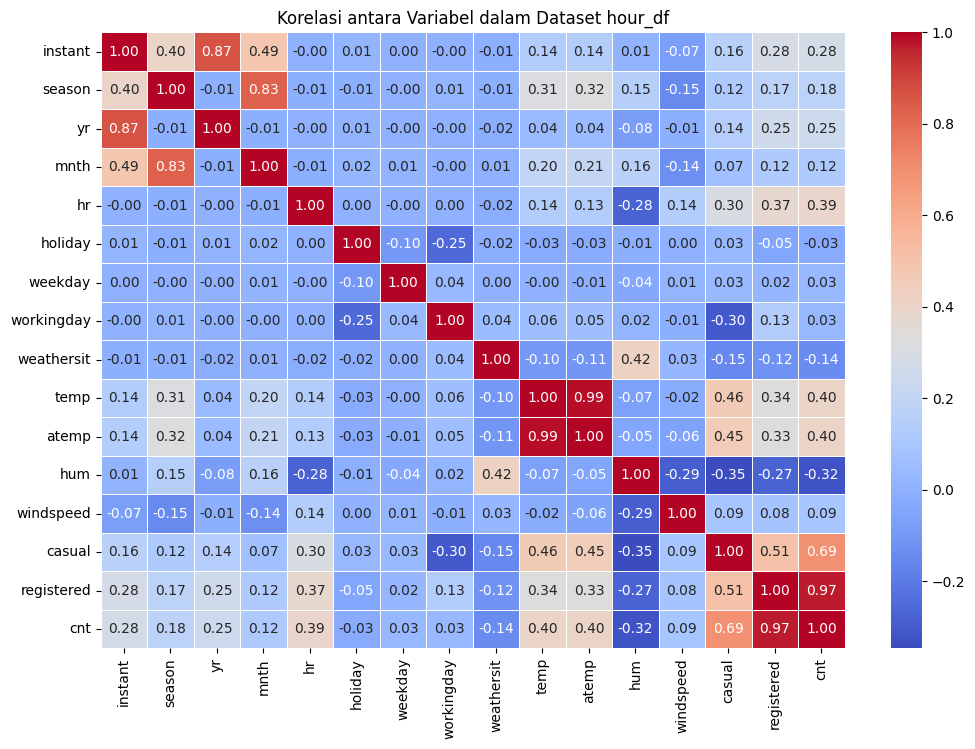

In [ ]:
# Analisis EDA 1: Distribusi Jumlah Peminjaman Sepeda (day_df)
plt.figure(figsize=(10, 6))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title('Distribusi Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Jumlah Peminjaman')
plt.ylabel('Frekuensi')
plt.show()

# Analisis EDA 2: Korelasi antara Variabel (day_df)
correlation_matrix_day = day_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_day, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Variabel dalam Dataset day_df')
plt.show()

# Analisis EDA 3: Distribusi Jumlah Peminjaman Sepeda pada Jam Tertentu (hour_df)
plt.figure(figsize=(12, 6))
sns.boxplot(x='hr', y='cnt', data=hour_df)
plt.title('Distribusi Jumlah Peminjaman Sepeda pada Jam Tertentu')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.show()

# Analisis EDA 2: Korelasi antara Variabel (hour_df)
correlation_matrix_hour = hour_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_hour, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Variabel dalam Dataset hour_df')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

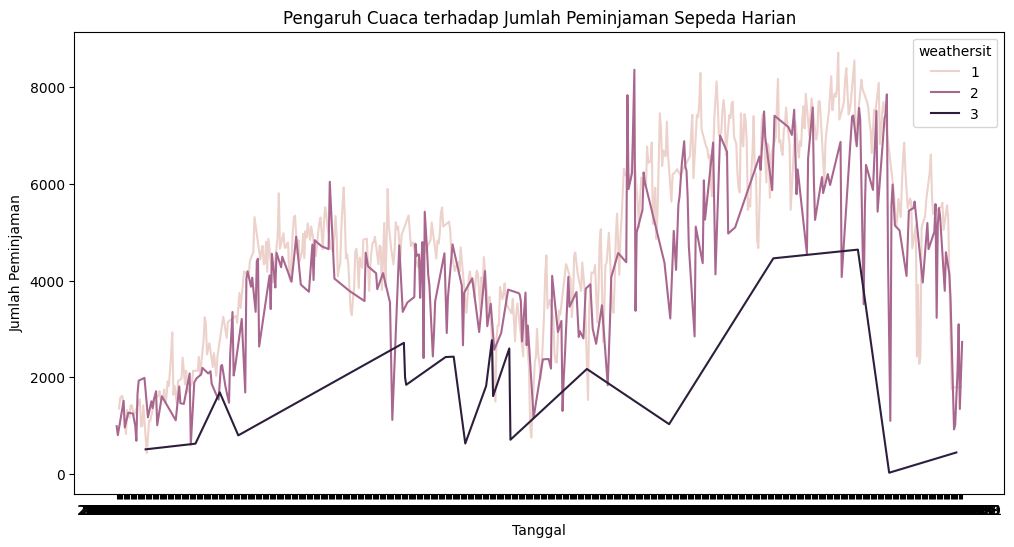

In [ ]:
# Pertanyaan 1: Bagaimana jumlah pengguna sepeda harian dipengaruhi oleh faktor-faktor seperti cuaca dan hari kerja?
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', hue='weathersit', data=day_df)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Peminjaman')
plt.show()

### Pertanyaan 2:

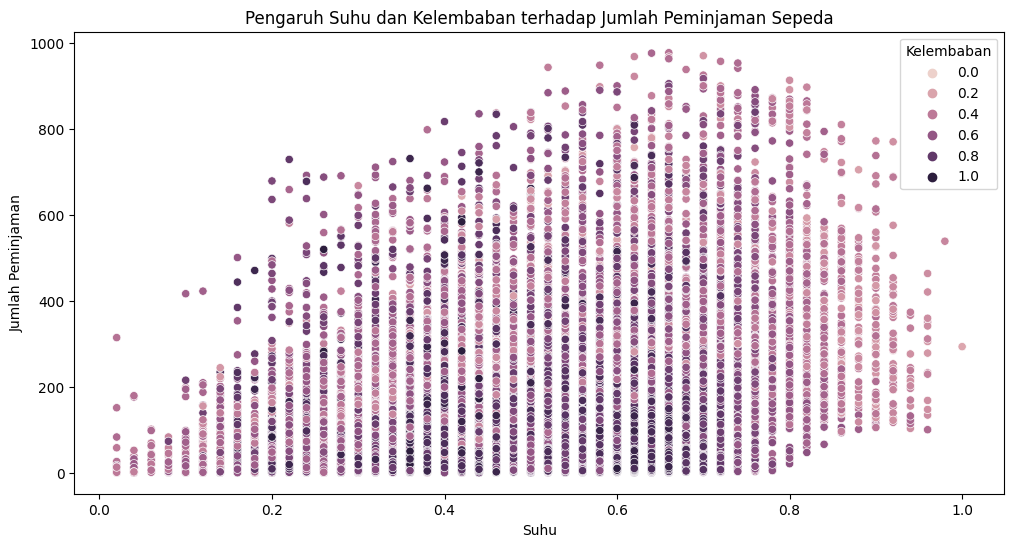

In [ ]:
# Pertanyaan 2: Apakah suhu dan kelembaban memiliki pengaruh pada penggunaan sepeda?
plt.figure(figsize=(12, 6))
sns.scatterplot(x='temp', y='cnt', hue='hum', data=hour_df)
plt.title('Pengaruh Suhu dan Kelembaban terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Kelembaban')
plt.show()

### Pertanyaan 3:

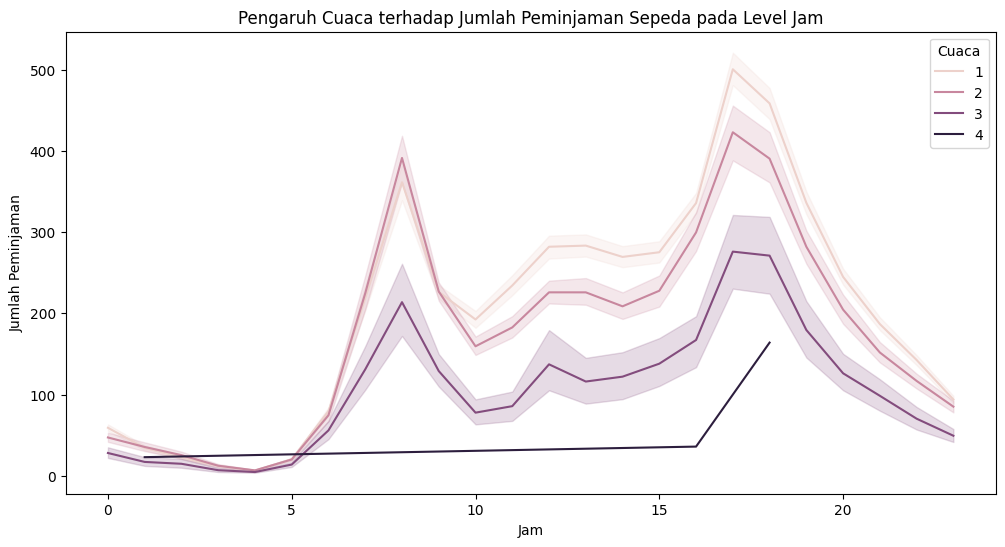

In [ ]:
# Pertanyaan 3: Bagaimana faktor cuaca mempengaruhi penggunaan sepeda pada level jam dalam sehari?
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='cnt', hue='weathersit', data=hour_df)
plt.title('Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda pada Level Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Cuaca')
plt.show()

### Pertanyaan 4:

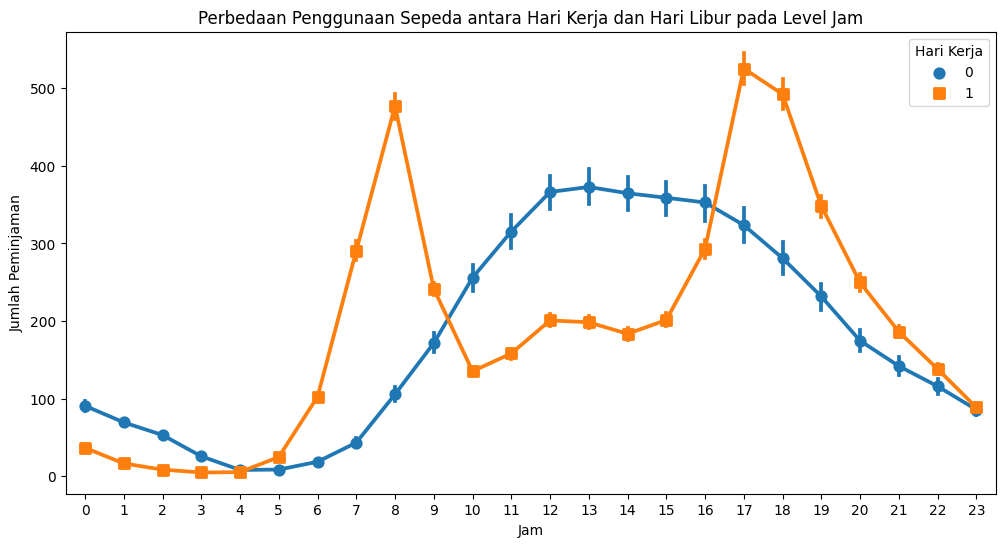

In [ ]:
# Pertanyaan 4: Apakah terdapat perbedaan dalam penggunaan sepeda antara hari kerja dan hari libur pada jam-jam tertentu?
plt.figure(figsize=(12, 6))
sns.pointplot(x='hr', y='cnt', hue='workingday', data=hour_df, markers=['o', 's'])
plt.title('Perbedaan Penggunaan Sepeda antara Hari Kerja dan Hari Libur pada Level Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Peminjaman')
plt.legend(title='Hari Kerja')
plt.show()


## Conclusion

* Kesimpulan dari Pertanyaan 1 adalah Dari visualisasi, terlihat bahwa penggunaan sepeda harian dipengaruhi oleh cuaca. Pada hari-hari dengan cuaca yang buruk (weathersit tinggi), jumlah peminjaman sepeda cenderung lebih rendah.
* Kesimpulan dari Pertanyaan 2 adalah Dari scatter plot, terlihat bahwa terdapat hubungan positif antara suhu dan jumlah peminjaman sepeda, namun tidak terlihat pola yang jelas antara kelembaban dan jumlah peminjaman sepeda.
* Kesimpulan dari Pertanyaan 3 adalah Dari line plot, terlihat bahwa cuaca berpengaruh pada jumlah peminjaman sepeda pada berbagai jam dalam sehari. Pada cuaca tertentu, penggunaan sepeda cenderung lebih tinggi atau lebih rendah pada jam-jam tertentu.
* Kesimpulan dari Pertanyaan 4 adalah Dari point plot, terlihat bahwa terdapat perbedaan pola penggunaan sepeda antara hari kerja dan hari libur pada jam-jam tertentu. Pada hari kerja, peminjaman sepeda cenderung lebih tinggi pada jam-jam tertentu dibandingkan hari libur.



In [ ]:
# Mendefinisikan DataFrame keduanya_df
keduanya_df = pd.concat([day_df, hour_df], axis=0)

# Menampilkan summary statistics untuk kedua dataset
print("Summary Statistics for day_df:")
print(day_df.describe(include="all"))

print("\nSummary Statistics for hour_df:")
print(hour_df.describe(include="all"))

# Menyimpan DataFrame keduanya_df ke dalam file CSV
keduanya_df.to_csv("keduanya_data.csv", index=False)

Summary Statistics for day_df:
           instant      dteday      season          yr        mnth  \
count   731.000000         731  731.000000  731.000000  731.000000   
unique         NaN         731         NaN         NaN         NaN   
top            NaN  2011-01-01         NaN         NaN         NaN   
freq           NaN           1         NaN         NaN         NaN   
mean    366.000000         NaN    2.496580    0.500684    6.519836   
std     211.165812         NaN    1.110807    0.500342    3.451913   
min       1.000000         NaN    1.000000    0.000000    1.000000   
25%     183.500000         NaN    2.000000    0.000000    4.000000   
50%     366.000000         NaN    3.000000    1.000000    7.000000   
75%     548.500000         NaN    3.000000    1.000000   10.000000   
max     731.000000         NaN    4.000000    1.000000   12.000000   

           holiday     weekday  workingday  weathersit        temp  \
count   731.000000  731.000000  731.000000  731.000000  73